# Plotting Hyperparameter Surfaces
This tutorial covers the ['plotting hyperparameter surfaces' example](https://openml.github.io/openml-python/master/examples/30_extended/plot_svm_hyperparameters_tutorial.html#sphx-glr-examples-30-extended-plot-svm-hyperparameters-tutorial-py), but has minor modifications for the purpose of the tutorial.

In this tutorial we will cover how to visualize the effect of tuning hyperparameters for a certain algorithm on a certain task. This will result in the images below:

<img src="images/openml/svc_hexplot.png" style='width: 48%; float: left;'/><img src="images/openml/svc_scatterheat.png" style='width: 48%;'/>

In [1]:
%matplotlib notebook
import openml
import numpy as np

## Obtaining the data

First, we need to choose an SVM flow, for example 8353, and a task.
Finding the IDs of them are not part of this tutorial, this could for example be done via the website.
For this we use the function ``list_evaluations_setup`` which can automatically join
evaluations conducted by the server with the hyperparameter settings extracted from the
uploaded runs (called *setup*).

In [2]:
df = openml.evaluations.list_evaluations_setups(
    function='predictive_accuracy',
    flow=[8353],
    task=[6],
    output_format='dataframe',
    # Using this flag incorporates the hyperparameters into the returned dataframe. Otherwise,
    # the dataframe would contain a field ``paramaters`` containing an unparsed dictionary.
    parameters_in_separate_columns=True,
)
df.head()

,run_id,task_id,setup_id,flow_id,flow_name,data_id,data_name,function,upload_time,uploader,...,sklearn.svm.classes.SVC(16)_verbose,hyperimp.utils.preprocessing.ConditionalImputer2(1)_axis,hyperimp.utils.preprocessing.ConditionalImputer2(1)_categorical_features,hyperimp.utils.preprocessing.ConditionalImputer2(1)_copy,hyperimp.utils.preprocessing.ConditionalImputer2(1)_fill_empty,hyperimp.utils.preprocessing.ConditionalImputer2(1)_missing_values,hyperimp.utils.preprocessing.ConditionalImputer2(1)_strategy,hyperimp.utils.preprocessing.ConditionalImputer2(1)_strategy_nominal,hyperimp.utils.preprocessing.ConditionalImputer2(1)_verbose,"sklearn.pipeline.Pipeline(imputation=hyperimp.utils.preprocessing.ConditionalImputer2,hotencoding=sklearn.preprocessing.data.OneHotEncoder,scaling=sklearn.preprocessing.data.StandardScaler,variencethreshold=sklearn.feature_selection.variance_threshold.VarianceThreshold,clf=sklearn.svm.classes.SVC)(1)_memory"
0,9154533,6,7087003,8353,sklearn.pipeline.Pipeline(imputation=hyperimp....,6,letter,predictive_accuracy,2018-04-15 08:15:08,1935,...,false,0,[],true,0,"""NaN""","""mean""","""most_frequent""",0,null
1,9154536,6,7087006,8353,sklearn.pipeline.Pipeline(imputation=hyperimp....,6,letter,predictive_accuracy,2018-04-15 08:15:17,1935,...,false,0,[],true,0,"""NaN""","""mean""","""most_frequent""",0,null
2,9154539,6,7087009,8353,sklearn.pipeline.Pipeline(imputation=hyperimp....,6,letter,predictive_accuracy,2018-04-15 08:15:24,1935,...,false,0,[],true,0,"""NaN""","""mean""","""most_frequent""",0,null
3,9154544,6,7087014,8353,sklearn.pipeline.Pipeline(imputation=hyperimp....,6,letter,predictive_accuracy,2018-04-15 08:15:33,1935,...,false,0,[],true,0,"""NaN""","""mean""","""most_frequent""",0,null
4,9154546,6,7087016,8353,sklearn.pipeline.Pipeline(imputation=hyperimp....,6,letter,predictive_accuracy,2018-04-15 08:15:37,1935,...,false,0,[],true,0,"""NaN""","""mean""","""most_frequent""",0,null


We can see all the hyperparameter names in the columns of the dataframe, but let's look at the SVC hyperparamters in particular:

In [7]:
df.columns[df.columns.str.startswith('sklearn.svm')]

Index(['sklearn.svm.classes.SVC(16)_C',
       'sklearn.svm.classes.SVC(16)_cache_size',
       'sklearn.svm.classes.SVC(16)_class_weight',
       'sklearn.svm.classes.SVC(16)_coef0',
       'sklearn.svm.classes.SVC(16)_decision_function_shape',
       'sklearn.svm.classes.SVC(16)_degree',
       'sklearn.svm.classes.SVC(16)_gamma',
       'sklearn.svm.classes.SVC(16)_kernel',
       'sklearn.svm.classes.SVC(16)_max_iter',
       'sklearn.svm.classes.SVC(16)_probability',
       'sklearn.svm.classes.SVC(16)_random_state',
       'sklearn.svm.classes.SVC(16)_shrinking',
       'sklearn.svm.classes.SVC(16)_tol',
       'sklearn.svm.classes.SVC(16)_verbose'],
      dtype='object')

Next, we cast and transform the hyperparameters of interest (``C`` and ``gamma``) so that we can nicely plot them.

In [4]:
hyperparameters = ['sklearn.svm.classes.SVC(16)_C', 'sklearn.svm.classes.SVC(16)_gamma']
df[hyperparameters] = df[hyperparameters].astype(float).apply(np.log)

## Plotting via the pandas helper functions


<IPython.core.display.Javascript object>


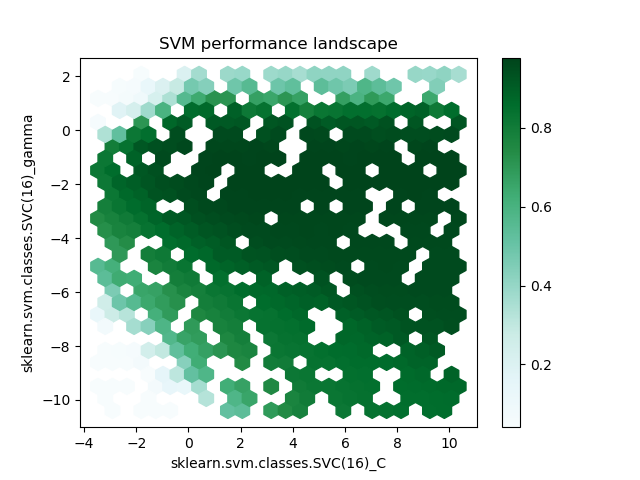

In [8]:
df.plot.hexbin(
    x='sklearn.svm.classes.SVC(16)_C',
    y='sklearn.svm.classes.SVC(16)_gamma',
    C='value',
    reduce_C_function=np.mean,
    gridsize=25,
    title='SVM performance landscape',
)

## Plotting via matplotlib

<IPython.core.display.Javascript object>


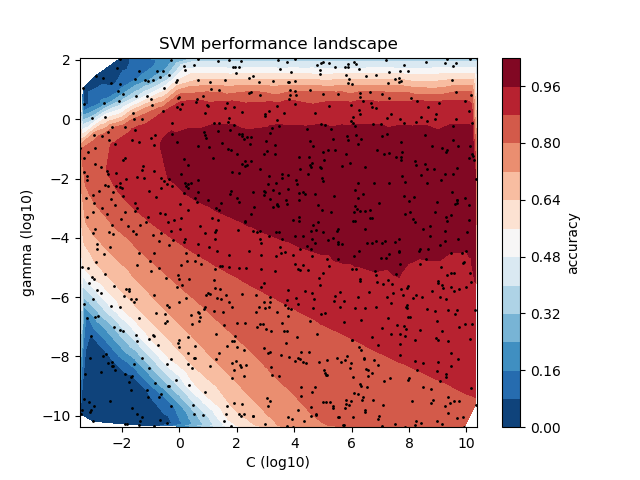

Text(0.5, 1.0, 'SVM performance landscape')

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

C = df['sklearn.svm.classes.SVC(16)_C']
gamma = df['sklearn.svm.classes.SVC(16)_gamma']
score = df['value']

# Plotting all evaluations:
ax.plot(C, gamma, 'ko', ms=1)
# Create a contour plot
cntr = ax.tricontourf(C, gamma, score, levels=12, cmap="RdBu_r")
# Adjusting the colorbar
fig.colorbar(cntr, ax=ax, label="accuracy")
# Adjusting the axis limits
ax.set(
    xlim=(min(C), max(C)),
    ylim=(min(gamma), max(gamma)),
    xlabel="C (log10)",
    ylabel="gamma (log10)",
)
ax.set_title('SVM performance landscape')


---
Code in this notebook is in large part taken from openml-python under the BSD-3-Clause license, see `Talks\odsc\LICENSE`.